In [1]:
import pandas as pd
df = pd.read_parquet('green_tripdata_2022-01.parquet')

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62495 entries, 0 to 62494
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62495 non-null  int64         
 1   lpep_pickup_datetime   62495 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62495 non-null  datetime64[ns]
 3   store_and_fwd_flag     56200 non-null  object        
 4   RatecodeID             56200 non-null  float64       
 5   PULocationID           62495 non-null  int64         
 6   DOLocationID           62495 non-null  int64         
 7   passenger_count        56200 non-null  float64       
 8   trip_distance          62495 non-null  float64       
 9   fare_amount            62495 non-null  float64       
 10  extra                  62495 non-null  float64       
 11  mta_tax                62495 non-null  float64       
 12  tip_amount             62495 non-null  float64       
 13  t

In [3]:
print(df.head())

   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2022-01-01 00:14:21   2022-01-01 00:15:33                  N   
1         1  2022-01-01 00:20:55   2022-01-01 00:29:38                  N   
2         1  2022-01-01 00:57:02   2022-01-01 01:13:14                  N   
3         2  2022-01-01 00:07:42   2022-01-01 00:15:57                  N   
4         2  2022-01-01 00:07:50   2022-01-01 00:28:52                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            42            42              1.0           0.44   
1         1.0           116            41              1.0           2.10   
2         1.0            41           140              1.0           3.70   
3         1.0           181           181              1.0           1.69   
4         1.0            33           170              1.0           6.26   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0   

In [4]:
print(df.describe())

           VendorID    RatecodeID  PULocationID  DOLocationID  \
count  62495.000000  56200.000000  62495.000000  62495.000000   
mean       1.849508      1.198719     97.615041    135.969902   
std        0.357556      0.862313     62.987311     77.590956   
min        1.000000      1.000000      1.000000      1.000000   
25%        2.000000      1.000000     55.000000     74.000000   
50%        2.000000      1.000000     75.000000    137.000000   
75%        2.000000      1.000000    130.000000    215.000000   
max        2.000000      5.000000    265.000000    265.000000   

       passenger_count  trip_distance   fare_amount        extra  \
count     56200.000000   62495.000000  62495.000000  62495.00000   
mean          1.258399      77.758632     13.914000      0.34756   
std           0.877743    2909.354163     12.088819      0.65781   
min           0.000000       0.000000    -65.000000     -4.50000   
25%           1.000000       1.080000      7.000000      0.00000   
50%   

In [5]:
# check for duplicates
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())



Number of duplicate rows: 0


# Handling Missing Values

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_values_percent = 100 * missing_values / len(df)

# Print the percentage of missing values in each column
print(missing_values_percent)

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag        10.072806
RatecodeID                10.072806
PULocationID               0.000000
DOLocationID               0.000000
passenger_count           10.072806
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type              10.072806
trip_type                 10.072806
congestion_surcharge      10.072806
dtype: float64


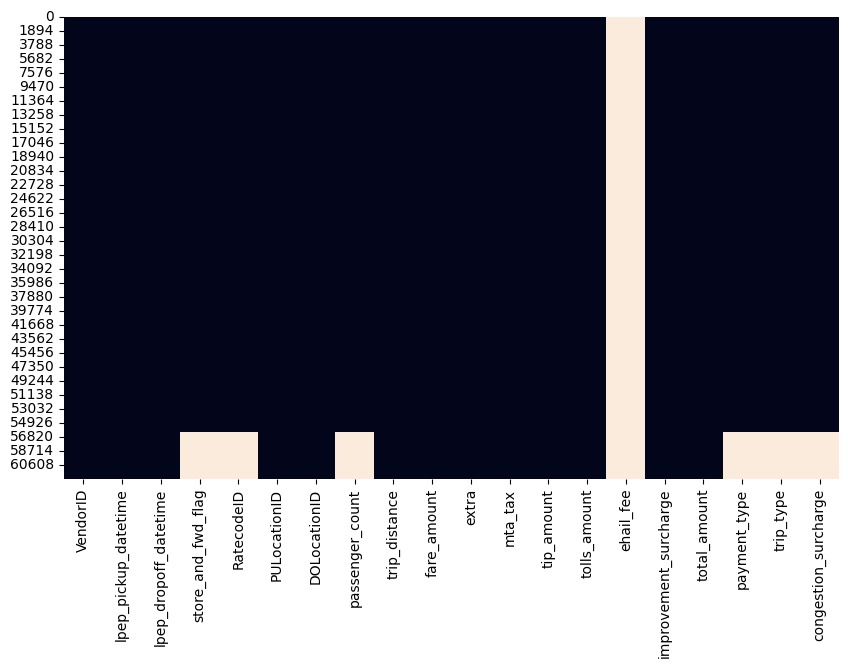

In [7]:
# Plot a heatmap to visualize the pattern of missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [8]:
# missing values handling

# Fill the missing values in "store_and_fwd_flag" column with the most frequent value
df["store_and_fwd_flag"].fillna(df["store_and_fwd_flag"].mode()[0], inplace=True)

# Fill the missing values in "RatecodeID" column with the most frequent value
df["RatecodeID"].fillna(df["RatecodeID"].mode()[0], inplace=True)

# Fill the missing values in "passenger_count" column with the mean value
df["passenger_count"].fillna(df["passenger_count"].mean(), inplace=True)

# Fill the missing values in "payment_type" column with the most frequent value
df["payment_type"].fillna(df["payment_type"].mode()[0], inplace=True)

# Fill the missing values in "trip_type" column with the most frequent value
df["trip_type"].fillna(df["trip_type"].mode()[0], inplace=True)

# Fill the missing values in "congestion_surcharge" column with the mean value
df["congestion_surcharge"].fillna(df["congestion_surcharge"].mean(), inplace=True)

# Drop the column "ehail_fee" as it has 100% missing values
df.drop("ehail_fee", axis=1, inplace=True)


In [9]:
# Check for missing values after handling of missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_values_percent = 100 * missing_values / len(df)

# Print the percentage of missing values in each column
print(missing_values_percent)

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
dtype: float64


# Feature Creation

In [10]:
import numpy as np

# Adding time features--------------------------------------------------------------

# Convert pickup and dropoff datetime to datetime objects
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

# Calculate the duration of the trip
df['trip_duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['trip_duration_seconds'] = df['trip_duration'].dt.total_seconds()

# Extract the hour, minute, and day of the week from the pickup datetime
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_minute'] = df['lpep_pickup_datetime'].dt.minute
df['pickup_day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()

# Extract the hour, minute, and day of the week from the dropoff datetime
df['dropoff_hour'] = df['lpep_dropoff_datetime'].dt.hour
df['dropoff_minute'] = df['lpep_dropoff_datetime'].dt.minute
df['dropoff_day_of_week'] = df['lpep_dropoff_datetime'].dt.day_name()

def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

# Convert the pickup datetime and dropoff datetime to datetime type
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

# Extract hour of the day from pickup datetime
df['pickup_hour_of_day'] = df['lpep_pickup_datetime'].dt.hour

# Extract date of the day from pickup datetime
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day

# Add a new column 'Time of day' based on the hour of the day
df['Time_of_day'] = df['pickup_hour_of_day'].apply(time_of_day)


In [11]:
# Assign unique ID for locations 

# Extract the pickup and dropoff locations
pickup_locations = df["PULocationID"].unique()
dropoff_locations = df["DOLocationID"].unique()

# Create a dictionary mapping location IDs to unique integer values
location_dict = {location_id: i for i, location_id in enumerate(sorted(set(pickup_locations).union(dropoff_locations)))}

# Replace the pickup and dropoff location IDs with the new integer values
df["PULocationID"] = df["PULocationID"].map(location_dict)
df["DOLocationID"] = df["DOLocationID"].map(location_dict)

In [12]:
print(df.head())

   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2022-01-01 00:14:21   2022-01-01 00:15:33                  N   
1         1  2022-01-01 00:20:55   2022-01-01 00:29:38                  N   
2         1  2022-01-01 00:57:02   2022-01-01 01:13:14                  N   
3         2  2022-01-01 00:07:42   2022-01-01 00:15:57                  N   
4         2  2022-01-01 00:07:50   2022-01-01 00:28:52                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            37            37              1.0           0.44   
1         1.0           103            36              1.0           2.10   
2         1.0            36           126              1.0           3.70   
3         1.0           165           165              1.0           1.69   
4         1.0            28           155              1.0           6.26   

   fare_amount  ...  trip_duration_seconds  pickup_hour  pickup_minute  \


# Univariate Analysis

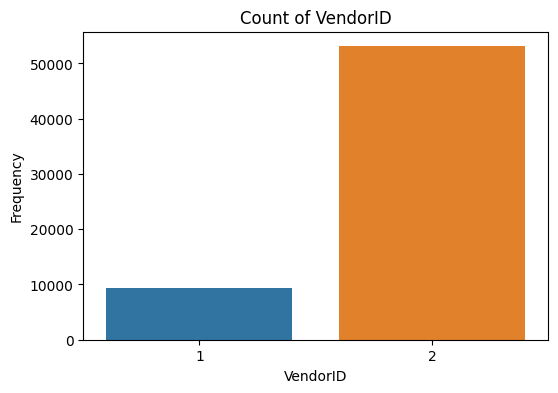

In [13]:
plt.figure(figsize=(6, 4))

# Count plt for VendorID 
sns.countplot(x='VendorID',data=df)
plt.title("Count of VendorID")
plt.xlabel("VendorID")
plt.ylabel("Frequency")
plt.show()



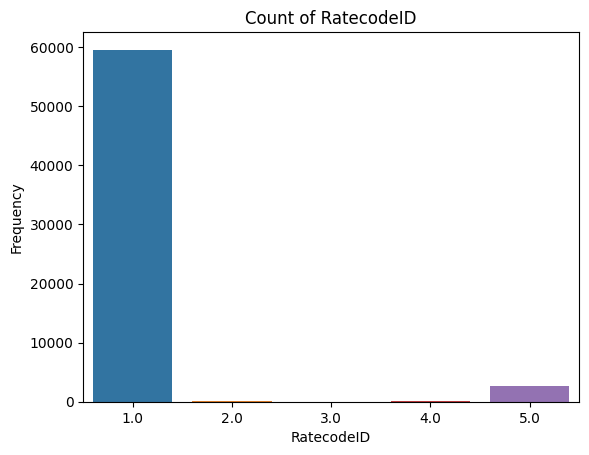

In [14]:

# Count plt for RatecodeID
sns.countplot(x='RatecodeID',data=df)
plt.title("Count of RatecodeID")
plt.xlabel("RatecodeID")
plt.ylabel("Frequency")
plt.show()



In [15]:
# Count of trips for PULocationID 

print(df.PULocationID.sort_values(ascending=False))


# Count of trips for DOLocationID 

print(df.DOLocationID.sort_values(ascending=False))


2353     246
57505    246
908      246
25919    246
38422    246
        ... 
19654      1
61912      1
56386      1
60576      1
32727      0
Name: PULocationID, Length: 62495, dtype: int64
51800    246
12332    246
61947    246
29317    246
56289    246
        ... 
470        0
42215      0
1173       0
31117      0
19940      0
Name: DOLocationID, Length: 62495, dtype: int64


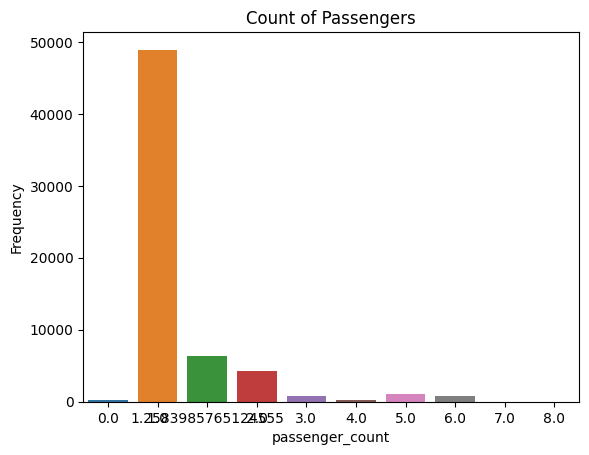

In [16]:
# Count plt for passenger_count
sns.countplot(x='passenger_count',data=df)
plt.title("Count of Passengers")
plt.xlabel("passenger_count")
plt.ylabel("Frequency")
plt.show()


In [17]:
# remove the rows which have 0 or 8 or 7 passenger count

df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]


df.passenger_count.value_counts()

1.000000    48910
1.258399     6295
2.000000     4243
5.000000     1086
6.000000      805
3.000000      728
4.000000      207
Name: passenger_count, dtype: int64

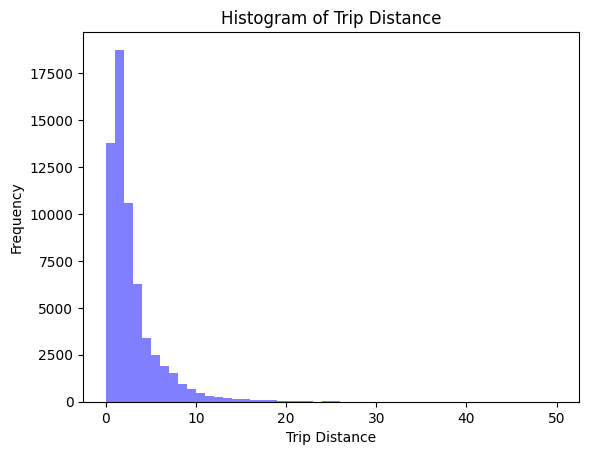

Mean trip distance: 78.0281200822173
Standard deviation of trip distance: 2914.4851522535705


In [18]:
import matplotlib.pyplot as plt


# Histogram of trip_distance
plt.hist(df["trip_distance"], bins=50, range=(0, 50), color='blue', alpha=0.5)
plt.xlabel("Trip Distance")
plt.ylabel("Frequency")
plt.title("Histogram of Trip Distance")
plt.show()

# Mean and standard deviation of trip_distance
mean_distance = np.mean(df["trip_distance"])
std_distance = np.std(df["trip_distance"])

print("Mean trip distance:", mean_distance)
print("Standard deviation of trip distance:", std_distance)

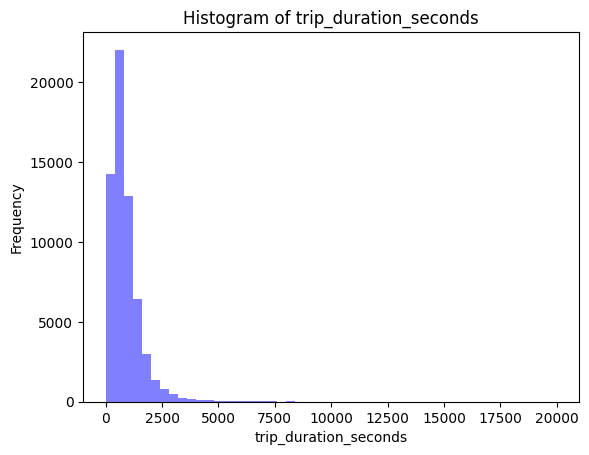

Mean trip_duration_seconds: 1143.1035263512863
Standard deviation of trip_duration_seconds: 4700.999895442494


In [19]:
# Histogram of trip_duration_seconds
plt.hist(df["trip_duration_seconds"], bins=50, range=(0, 20000), color='blue', alpha=0.5)
plt.xlabel("trip_duration_seconds")
plt.ylabel("Frequency")
plt.title("Histogram of trip_duration_seconds")
plt.show()

# Mean and standard deviation of trip_distance
mean_distance = np.mean(df["trip_duration_seconds"])
std_distance = np.std(df["trip_duration_seconds"])

print("Mean trip_duration_seconds:", mean_distance)
print("Standard deviation of trip_duration_seconds:", std_distance)

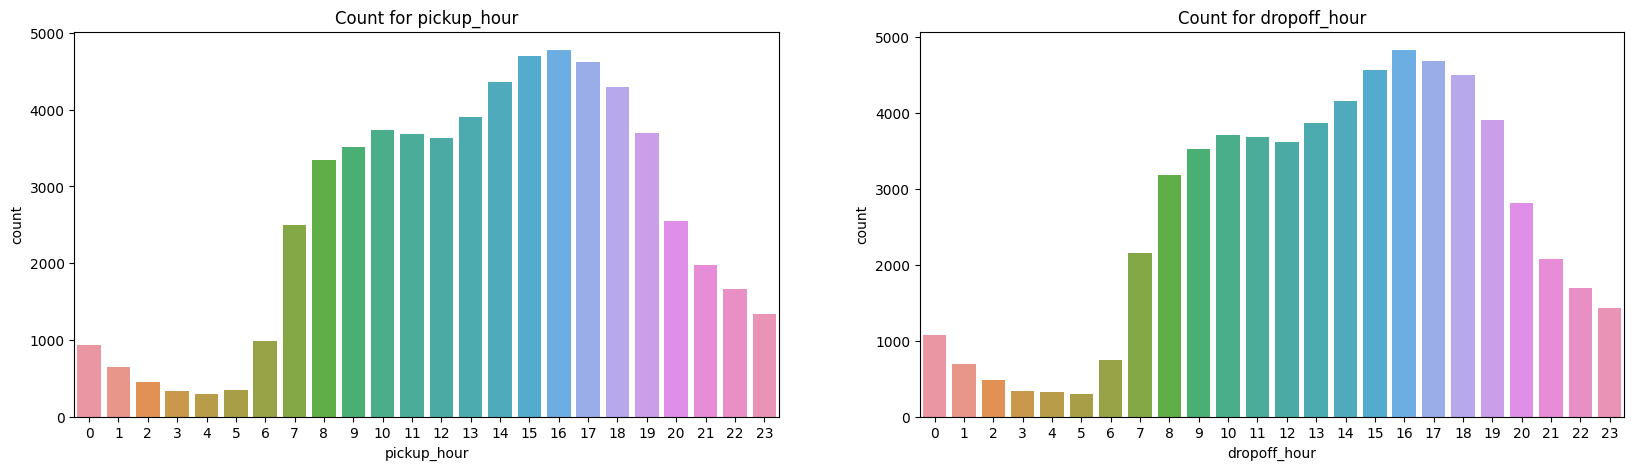

In [20]:
# Count plt for pickup_hour and dropoff_hour

figure,(plt1,plt2)=plt.subplots(ncols=2,figsize=(20,5))

plt1.set_title('Count for pickup_hour')
ax=sns.countplot(x="pickup_hour",data=df,ax=plt1)

plt2.set_title('Count for dropoff_hour')
ax=sns.countplot(x="dropoff_hour",data=df,ax=plt2)


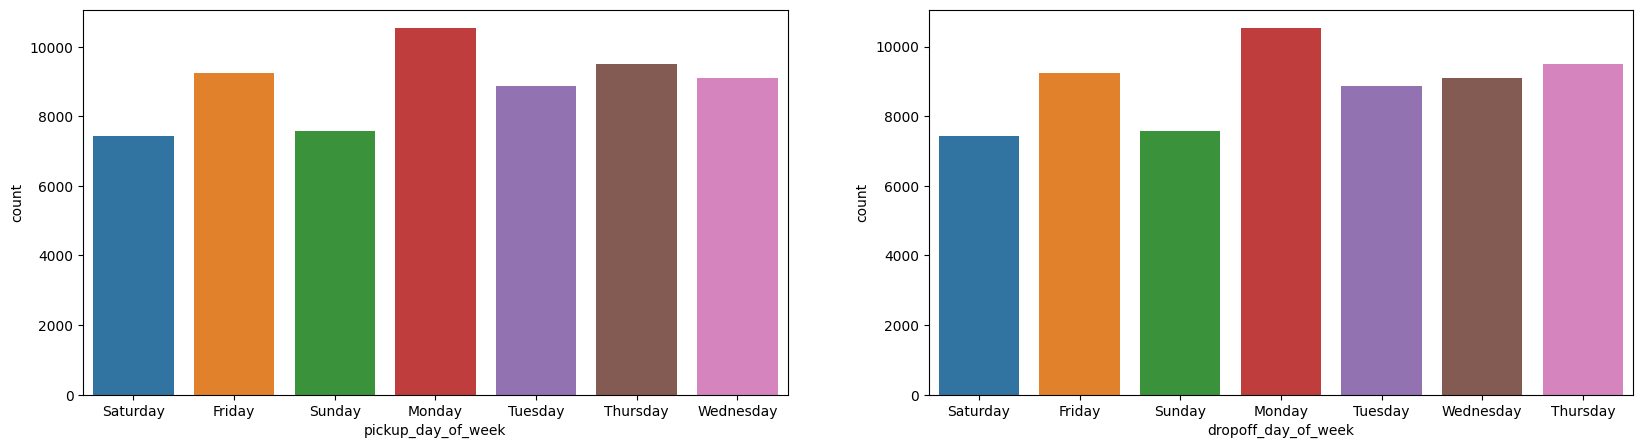

In [21]:
# Count plt for pickup_day_of_week and dropoff_hour

figure,(plt3,plt4)=plt.subplots(ncols=2,figsize=(20,5))

plt1.set_title('Trip Count for pickup_day_of_week')
ax=sns.countplot(x="pickup_day_of_week",data=df,ax=plt3)

plt2.set_title('Trip Count for dropoff_day_of_week')
ax=sns.countplot(x="dropoff_day_of_week",data=df,ax=plt4)


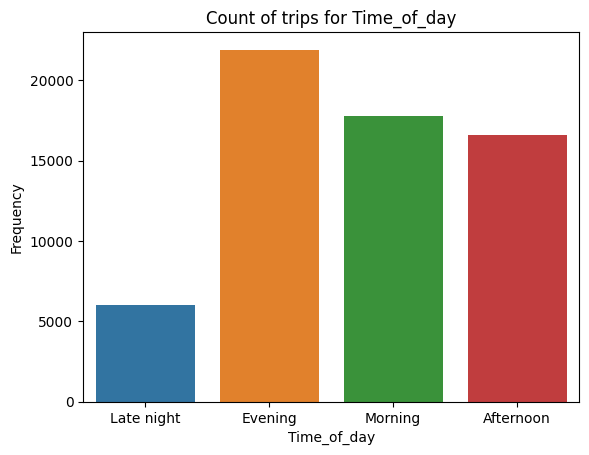

In [22]:

# Count plt for Time_of_day
sns.countplot(x='Time_of_day',data=df)
plt.title("Count of trips for Time_of_day")
plt.xlabel("Time_of_day")
plt.ylabel("Frequency")
plt.show()


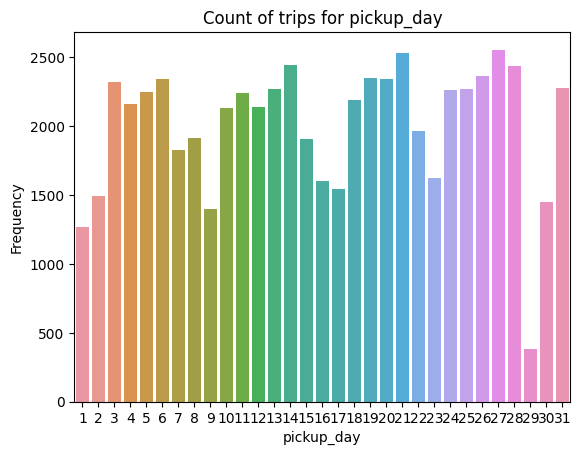

In [23]:
# Count plt for pickup_day
sns.countplot(x='pickup_day',data=df)
plt.title("Count of trips for pickup_day")
plt.xlabel("pickup_day")
plt.ylabel("Frequency")
plt.show()


# Bivariate Analysis

## Trip distance vs. Fare amount

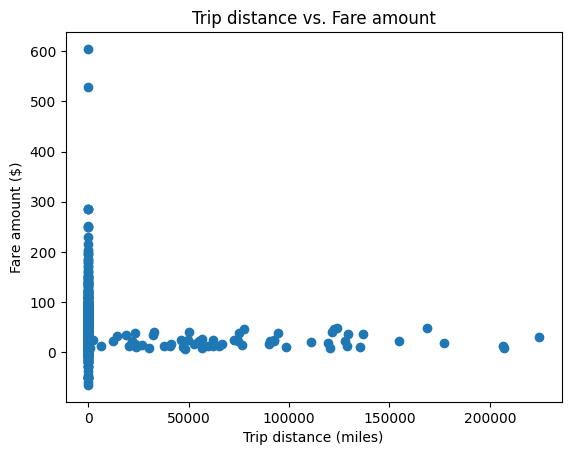

In [24]:
plt.scatter(df['trip_distance'], df['fare_amount'])
plt.title('Trip distance vs. Fare amount')
plt.xlabel('Trip distance (miles)')
plt.ylabel('Fare amount ($)')
plt.show()

## Passenger count vs. Trip distance


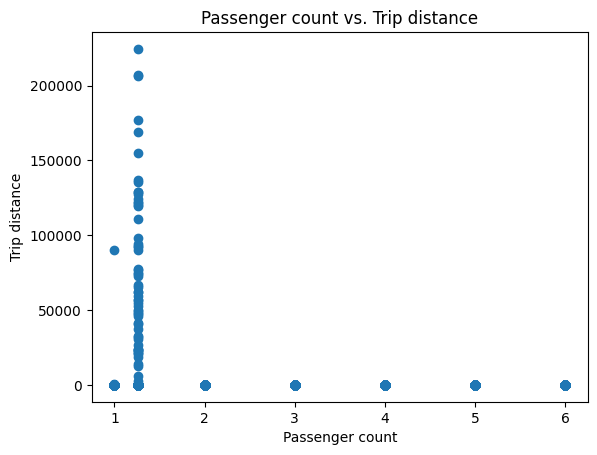

In [25]:
plt.scatter(df.passenger_count, df.trip_distance)
plt.xlabel('Passenger count')
plt.ylabel('Trip distance')
plt.title('Passenger count vs. Trip distance')
plt.show()

## Pickup day of week vs. Mean trip duration

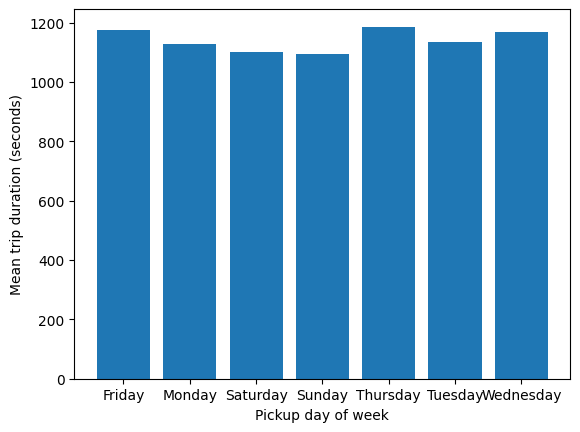

In [26]:
# group the data by pickup day of week and calculate the mean trip duration
grouped_data = df.groupby('pickup_day_of_week')['trip_duration_seconds'].mean()

# plot a bar chart of the mean trip duration for each day of the week
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Pickup day of week')
plt.ylabel('Mean trip duration (seconds)')
plt.show()

## Pickup hour of day vs Mean Trip distance

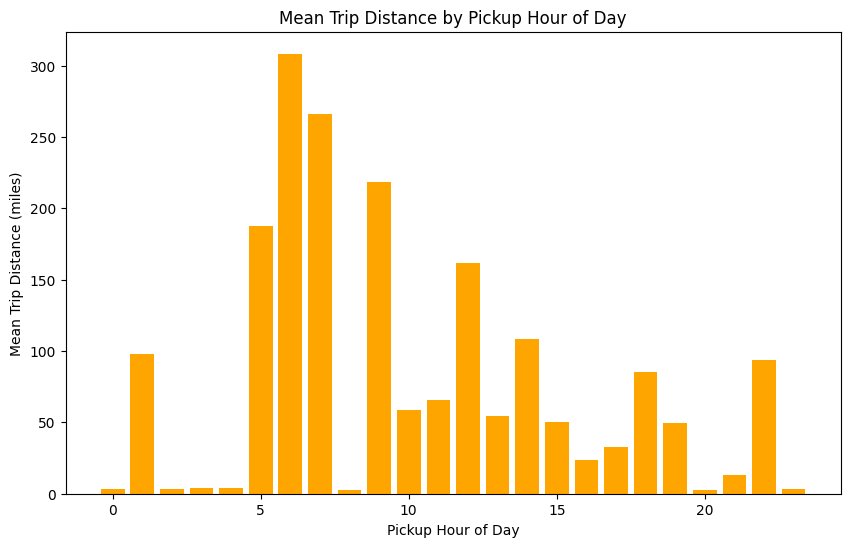

In [27]:
# Group the data by pickup hour and calculate the mean trip distance for each hour
hourly_trips = df.groupby('pickup_hour_of_day')['trip_distance'].mean()

# Create a bar chart of the mean trip distance by pickup hour of day
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(hourly_trips.index, hourly_trips.values, width=0.8, color='orange')

# Add labels and title
ax.set_xlabel('Pickup Hour of Day')
ax.set_ylabel('Mean Trip Distance (miles)')
ax.set_title('Mean Trip Distance by Pickup Hour of Day')

plt.show()